In [1]:
#|default_exp app

In [2]:
#|export
from fastai.vision.all import *
import gradio as gr


ModuleNotFoundError: No module named 'gradio'

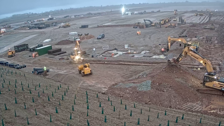

In [17]:
im = PILImage.create("FoundationPouring00.PNG")
im.thumbnail((224,224))
im

In [4]:
#|export
learn=load_learner("metamodel.pkl")

In [18]:
learn.predict(im)

('Foundation Pouring',
 TensorBase(0),
 TensorBase([1.0000e+00, 1.5273e-09, 3.1612e-08]))

In [20]:
#|export
categories = ("Foundation Pouring","Frame Installation","Land Excavation")

def classify_image(img):
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float, probs)))

In [21]:
classify_image(im)

{'Foundation Pouring': 1.0,
 'Frame Installation': 1.5272558773204992e-09,
 'Land Excavation': 3.161174078059048e-08}

In [ ]:
#|export
image = gr.Inputs.Image(shape=(512,512))
label = gr.Outputs.Label()
examples = ['FoundationPouring00.PNG','FrameInstallation00.PNG','LandExcavation00.PNG']
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

In [22]:
from nbdev.export import notebook2script

In [24]:
notebook2script('app.ipynb')

Converted app.ipynb.
